Predicting the Stock Market Using Machine Learning and Deep Learning

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =20,10

from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range=(0,1))

df = pd.read_csv('NSE-TATAGLOBAL11.csv')
df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


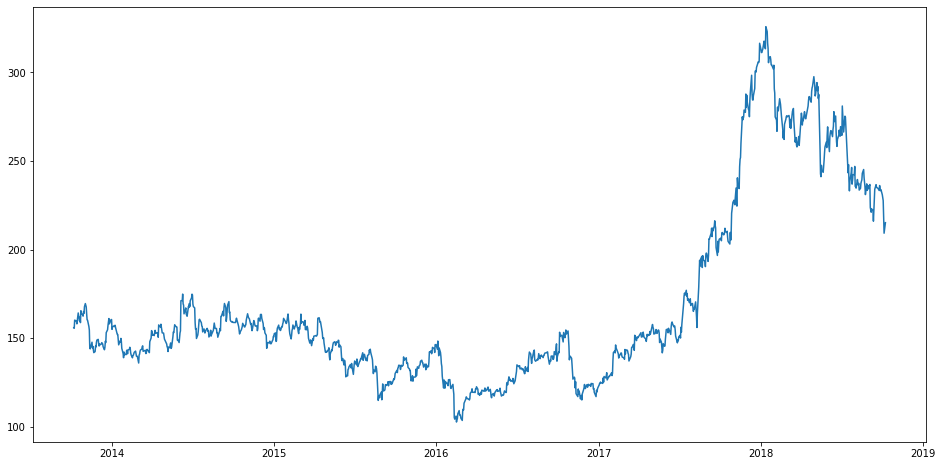

In [6]:
df['Date'] =pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df['Close'],label='Close Price history')

PREDICTION METHOD: Moving Average

In [23]:
print('\n Shape of the data:')
print(df.shape)

df['Date']=pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index =df['Date']

data = df.sort_index(ascending=True,axis =0)
new_data =pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range (0,len(data)):
    new_data['Date'][i]=data['Date'][i]
    new_data['Close'][i]=data['Close'][i]

train = new_data[:987]
valid =new_data[987:]
print('\n Shape of the training set:')
print(train.shape)

print('\n Shape of the validation set:')
print(valid.shape)

preds =[]
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum()+sum(preds)
    b=a/248
    preds.append(b)
    
error =np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print(error)








 Shape of the data:
(1235, 8)

 Shape of the training set:
(987, 2)

 Shape of the validation set:
(248, 2)
104.51415465984348


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


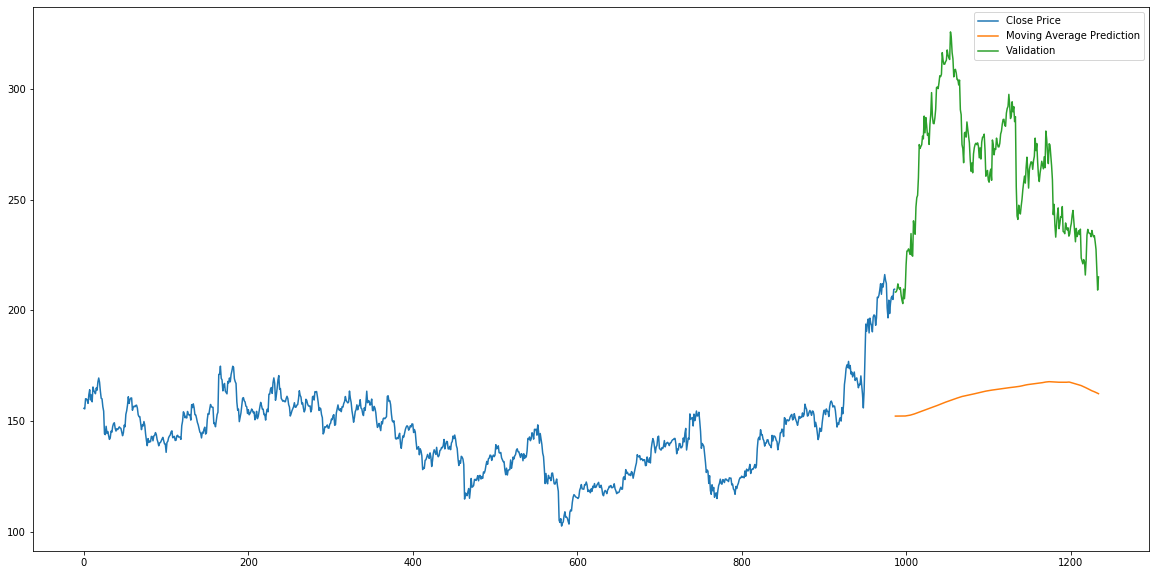

In [29]:
#plot

valid['Predictions'] = preds
plt.plot(train['Close'],label='Close Price')
plt.plot(valid['Predictions'],label='Moving Average Prediction')
plt.plot(valid['Close'],label='Validation')
plt.legend()



PREDICTION METHOD: Auto ARIMA

In [43]:
from pyramid.arima import auto_arima
df['Date']=pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index =df['Date']

data = df.sort_index(ascending=True,axis =0)
new_data =pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range (0,len(data)):
    new_data['Date'][i]=data['Date'][i]
    new_data['Close'][i]=data['Close'][i]

train = new_data[:987]
valid =new_data[987:]

training =train['Close']
validation=valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)


model.fit(training)


ARIMA_prediction=model.predict(n_periods=248)
ARIMA_prediction= pd.DataFrame(ARIMA_prediction,index = valid.index,columns=['Prediction'])
error =np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print(error)



Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4820.561, BIC=4844.968, Fit time=5.047 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=5479.245, BIC=5489.008, Fit time=0.053 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=5170.275, BIC=5189.801, Fit time=0.932 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4818.530, BIC=4838.055, Fit time=3.207 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=4816.433, BIC=4840.840, Fit time=2.727 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=5170.276, BIC=5189.801, Fit time=0.864 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=4818.340, BIC=4847.629, Fit time=11.854 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=5481.156, BIC=5495.800, Fit time=0.194 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=4818.627, BIC=4852.797, Fit time=10.568 seconds
Fit ARIMA: order=(1, 1, 1)

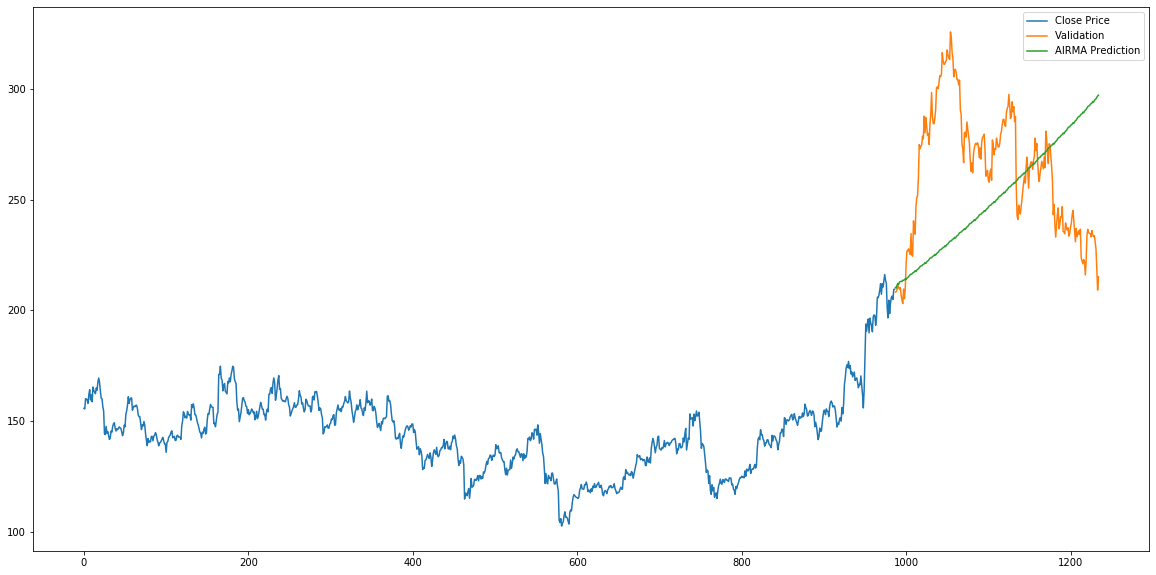

In [45]:
plt.plot(train['Close'],label='Close Price')
plt.plot(valid['Close'],label ='Validation')
plt.plot(ARIMA_prediction['Prediction'],label='AIRMA Prediction')
plt.legend()


PREDICTION METHOD: Prophet

In [9]:
from fbprophet import Prophet
df['Date']=pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index =df['Date']

data = df.sort_index(ascending=True,axis =0)
new_data =pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range (0,len(data)):
    new_data['Date'][i]=data['Date'][i]
    new_data['Close'][i]=data['Close'][i]
new_data.rename(columns={'Close':'y','Date':'ds'},inplace=True)
train = new_data[:987]
valid =new_data[987:]

model =Prophet()
model.fit(train)

prices = model.make_future_dataframe(periods = len(valid))
prpht_predictions = model.predict(prices)

prpht_predictions_valid = prpht_predictions['yhat'][987:]


error =np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(prpht_predictions_valid)),2)))
print(error)



INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


57.461756853455086


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


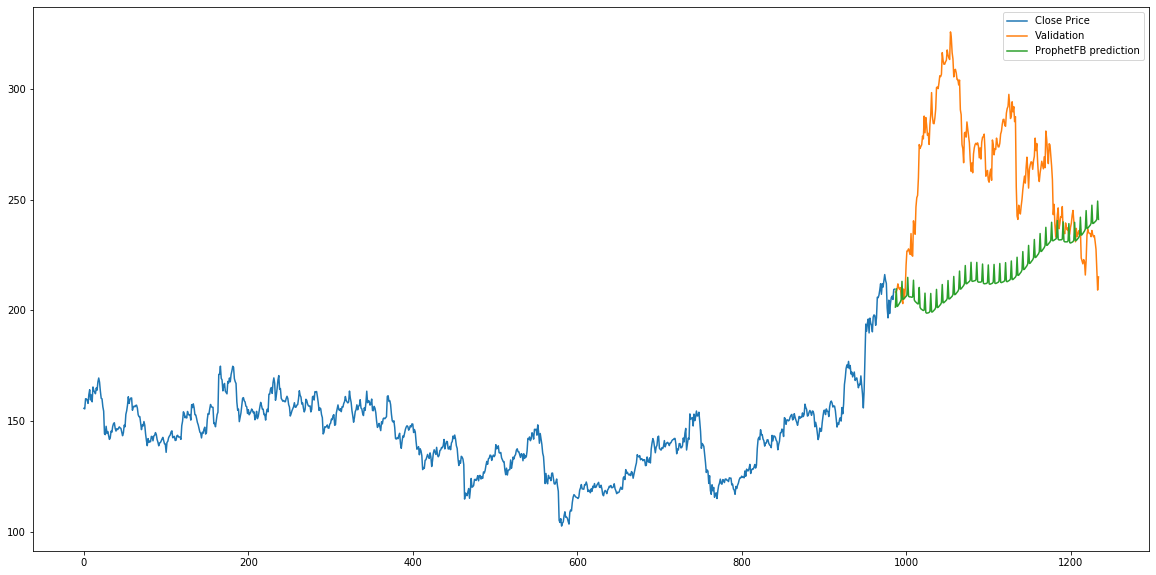

In [14]:
valid['Prediction'] =prpht_predictions_valid.values
plt.plot(train['y'],label='Close Price')
plt.plot(valid['y'],label ='Validation')
plt.plot(valid['Prediction'],label='ProphetFB prediction')
plt.legend()

PREDICTION METHOD: Long Short Term Memory (LTSM)

In [50]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout,LSTM
#DATA PROCESSING


data = df.sort_index(ascending=True,axis =0)
new_data =pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range (0,len(data)):
    new_data['Date'][i]=data['Date'][i]
    new_data['Close'][i]=data['Close'][i]
new_data.index=new_data.Date
new_data.drop('Date',axis=1,inplace=True)

dataset=new_data.values
    
train = dataset[0:987,:]
valid =dataset[987:,:]

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data =scaler.fit_transform(dataset)


x_train,y_train = [], [] 

for i in range (60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
 

x_train =np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))


#Creating the Model
pred_model =Sequential()
pred_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
pred_model.add(LSTM(units=50))
pred_model.add(Dense(1))


pred_model.compile(loss='mean_squared_error',optimizer='adam')
pred_model.fit(x_train,y_train,epochs=1,batch_size=1,verbose=2)

test_data = new_data[len(new_data) - len(valid) - 60:].values
test_data = test_data.reshape(-1,1)
test_data  = scaler.transform(test_data)

x_test_data = []
for i in range(60,test_data.shape[0]):
    x_test_data.append(test_data[i-60:i,0])
x_test_data = np.array(x_test_data)

x_test_data = np.reshape(x_test_data,(x_test_data.shape[0],x_test_data.shape[1],1))
predicted_price = pred_model.predict(x_test_data)
predicted_price =scaler.inverse_transform(predicted_price)

#predicted price is y_test_Data
    

error=np.sqrt(np.mean(np.power((valid-predicted_price),2)))
print(error)

Epoch 1/1
 - 35s - loss: 0.0011
9.108937921796125


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


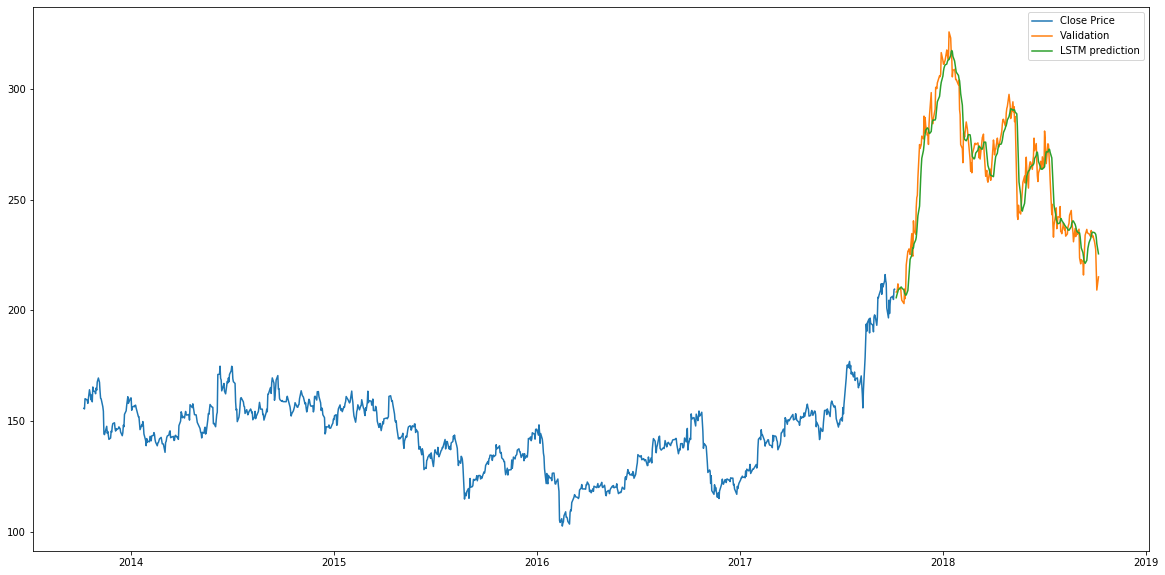

In [51]:
train = new_data[:987]
valid = new_data[987:]
valid['Prediction'] =predicted_price
plt.plot(train['Close'],label='Close Price')
plt.plot(valid['Close'],label ='Validation')
plt.plot(valid['Prediction'],label='LSTM prediction')
plt.legend()